In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#Training Data
x1 = np.array([1,1,0,0])
x2 = np.array([1,0,0,1,])

y = np.array([1,1,0,0]).reshape(-1,1) #Column Matrix

sample = len(x1)

In [3]:
input = np.array([x1,x2]).T
print("Input Shape : ",input.shape)
print("Output Shape : ",y.shape)

Input Shape :  (4, 2)
Output Shape :  (4, 1)


In [4]:
#Defininig sigmoid and its derivative
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1-x);

In [5]:
#Defining no of Neurons
input_neuron = 2
hidden_neuron = 2
output_neuron = 1

In [6]:
#Assigning random weights
w1 = np.random.rand(input_neuron,hidden_neuron)
w2 = np.random.rand(hidden_neuron,output_neuron)
print("W1 Shape : ",w1.shape)
print("W2 Shape : ",w2.shape)

W1 Shape :  (2, 2)
W2 Shape :  (2, 1)


In [7]:
#Forward Propagation
def forward_propagation(x,w1,w2):
  z1 = np.dot(x,w1);
  a1 = sigmoid(z1)
  z2 = np.dot(a1,w2)
  a2 = sigmoid(z2)
  return z1,a1,z2,a2

#Backward Propagation
def backward_propagation(w1,w2,z1,z2,a1,a2,y):
  dz2 = a2 - y
  dw2 = np.dot(a1.T,dz2)/sample
  dz1 = np.dot(dw2,dz2.T) * sigmoid_derivative(a1.T)
  dw1 = np.dot(dz1,input).T/sample
  return dz2,dw2,dz1,dw1


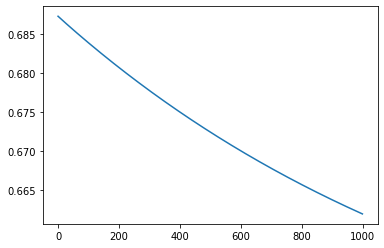

In [8]:
l = []
epochs = 1000

learning_rate = 0.1

for i in range(epochs):
  z1,a1,z2,a2 = forward_propagation(input,w1,w2)
  #Loss Function => cross entropy
  loss = -(1/sample)*np.sum(y*np.log(a2) + (1-y)*np.log(1-a2))
  l.append(loss)
  _,dw2,_,dw1 = backward_propagation(w1,w2,z1,z2,a1,a2,y)
  w2 = w2 - 0.1*dw2
  w1 = w1 - 0.1*dw1
  
plt.plot(l)

In [9]:
_,_,_,a2 = forward_propagation(input,w1,w2)
a2

array([[0.56994897],
       [0.57444756],
       [0.53301882],
       [0.53680323]])

In [10]:
_,_,_,out = forward_propagation(np.array([0,0]),w1,w2)
fun = lambda fun : 1 if(fun >= 0.5) else 0
print("F(0,0) => ",fun(out))

F(0,0) =>  1


In [11]:
_,_,_,out = forward_propagation(np.array([1,0]),w1,w2)
fun = lambda fun : 1 if(fun >= 0.5) else 0
print("F(0,0) => ",fun(out))

F(0,0) =>  1


In [12]:
_,_,_,out = forward_propagation(np.array([0,1]),w1,w2)
fun = lambda fun : 1 if(fun >= 0.5) else 0
print("F(0,0) => ",fun(out))

F(0,0) =>  1


In [13]:
_,_,_,out = forward_propagation(np.array([1,1]),w1,w2)
fun = lambda fun : 1 if(fun >= 0.5) else 0
print("F(0,0) => ",fun(out))

F(0,0) =>  1
